In [1]:
!pip install pandas numpy scikit-learn

In [2]:
!pip install nltk

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
#Dataset Creation

In [5]:
import random

companies = ["EcoPlast", "GreenEnergyCo", "FastFashionX", "PureDrinks", 
             "AutoFuture", "FreshFoods", "PowerCorp", "Clothify", 
             "BioTechX", "UrbanFoods"]

genuine_claims = [
    "Our packaging is made from 100% recycled materials",
    "We reduced carbon emissions by 40% in the past 5 years",
    "The company sources raw materials from certified sustainable farms",
    "All our factories are powered by renewable energy",
    "We comply with international environmental standards ISO 14001",
    "Our vehicles now run on clean electric energy",
    "We conduct third-party audits on all sustainability practices",
    "We have implemented strict water conservation policies",
    "Our products are biodegradable and eco-certified",
    "We partnered with NGOs for transparent reforestation projects"
]

greenwashing_claims = [
    "Our product is eco-friendly without providing certifications",
    "We are carbon neutral just because we buy carbon offsets",
    "Our sustainability report highlights vague goals with no data",
    "We use green labels without third-party verification",
    "Our ads emphasize nature but production uses fossil fuels",
    "We say 100% natural but only a small portion is natural",
    "We promise zero emissions without independent audit",
    "Our packaging says recyclable but local facilities can’t recycle it",
    "We highlight one green initiative but ignore larger pollution issues",
    "Our brand claims to be eco-safe but provides no public data"
]

# Expand dataset
data = []
for _ in range(50):  # 50 genuine
    data.append([random.choice(companies), random.choice(genuine_claims), "genuine"])
for _ in range(50):  # 50 greenwashing
    data.append([random.choice(companies), random.choice(greenwashing_claims), "greenwashing"])




In [6]:
df = pd.DataFrame(data, columns=["Company", "Claim", "Label"])
print("✅ Dataset created with size:", df.shape)
df.head()

✅ Dataset created with size: (100, 3)


,Company,Claim,Label
0,EcoPlast,Our packaging is made from 100% recycled mater...,genuine
1,AutoFuture,Our packaging is made from 100% recycled mater...,genuine
2,Clothify,All our factories are powered by renewable energy,genuine
3,BioTechX,Our products are biodegradable and eco-certified,genuine
4,BioTechX,All our factories are powered by renewable energy,genuine


In [7]:
print("Shape:", df.shape)

Shape: (100, 3)


In [8]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Company    0
Claim      0
Label      0
dtype: int64


In [9]:
print("\nLabel counts:\n", df['Label'].value_counts())


Label counts:
 Label
genuine         50
greenwashing    50
Name: count, dtype: int64


In [10]:
#Pre-Processing step1- Data Cleaning

In [11]:
import re

def clean_text(text):
    text = text.lower()                     # lowercase
    text = re.sub(r'[^a-z\s]', '', text)    # keep only letters and spaces
    text = re.sub(r'\s+', ' ', text).strip() # remove extra spaces
    return text

df['Cleaned_Claim'] = df['Claim'].apply(clean_text)
df[['Claim', 'Cleaned_Claim']]

,Claim,Cleaned_Claim
0,Our packaging is made from 100% recycled mater...,our packaging is made from recycled materials
1,Our packaging is made from 100% recycled mater...,our packaging is made from recycled materials
2,All our factories are powered by renewable energy,all our factories are powered by renewable energy
3,Our products are biodegradable and eco-certified,our products are biodegradable and ecocertified
4,All our factories are powered by renewable energy,all our factories are powered by renewable energy
...,...,...
95,We promise zero emissions without independent ...,we promise zero emissions without independent ...
96,Our brand claims to be eco-safe but provides n...,our brand claims to be ecosafe but provides no...
97,We highlight one green initiative but ignore l...,we highlight one green initiative but ignore l...
98,Our packaging says recyclable but local facili...,our packaging says recyclable but local facili...


In [12]:
from sklearn.model_selection import train_test_split

X = df['Cleaned_Claim']   # feature
y = df['Label']           # target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training size:", X_train.shape[0])
print("Testing size:", X_test.shape[0])

Training size: 80
Testing size: 20


In [13]:
#Step2 - text vectorization

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("TF-IDF shape (train):", X_train_tfidf.shape)
print("TF-IDF shape (test):", X_test_tfidf.shape)

TF-IDF shape (train): (80, 93)
TF-IDF shape (test): (20, 93)


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize model
log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(X_train_tfidf, y_train)

y_pred = log_reg.predict(X_test_tfidf)


In [16]:
accuracy = accuracy_score(y_test, y_pred)
print("✅ Logistic Regression Accuracy:", accuracy)

print("\n📌 Classification Report:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("\n📌 Confusion Matrix:\n", cm)


✅ Logistic Regression Accuracy: 1.0

📌 Classification Report:

              precision    recall  f1-score   support

     genuine       1.00      1.00      1.00        10
greenwashing       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20


📌 Confusion Matrix:
 [[10  0]
 [ 0 10]]


In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

# Define multiple models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "SVM": LinearSVC()
}

results = {}

# Train & evaluate
for name, clf in models.items():
    clf.fit(X_train_tfidf, y_train)
    y_pred = clf.predict(X_test_tfidf)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"✅ {name} Accuracy: {acc:.2f}")



✅ Logistic Regression Accuracy: 1.00
✅ Naive Bayes Accuracy: 1.00
✅ SVM Accuracy: 1.00


In [18]:
import pandas as pd

results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])
print("\n📌 Model Comparison:\n")
print(results_df)



📌 Model Comparison:

                 Model  Accuracy
0  Logistic Regression       1.0
1          Naive Bayes       1.0
2                  SVM       1.0


In [19]:
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

print(f"\n🏆 Best Model: {best_model_name} with Accuracy {results[best_model_name]:.2f}\n")

y_pred_best = best_model.predict(X_test_tfidf)

print("📌 Classification Report:\n")
print(classification_report(y_test, y_pred_best))

print("\n📌 Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_best))



🏆 Best Model: Logistic Regression with Accuracy 1.00

📌 Classification Report:

              precision    recall  f1-score   support

     genuine       1.00      1.00      1.00        10
greenwashing       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20


📌 Confusion Matrix:

[[10  0]
 [ 0 10]]


In [20]:
!pip install matplotlib seaborn


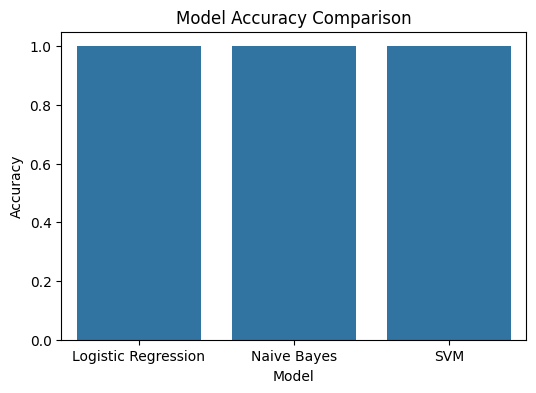

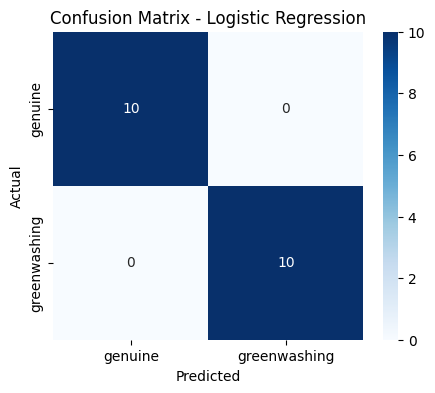

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Model comparison bar chart
plt.figure(figsize=(6,4))
sns.barplot(x="Model", y="Accuracy", data=results_df)
plt.title("Model Accuracy Comparison")
plt.show()

# Confusion Matrix heatmap (best model)
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [22]:
sample_claims = [
    "Our brand is 100% eco-friendly and sustainable in all operations",
    "We offset emissions by planting trees, but no audit is done"
]

sample_vec = vectorizer.transform(sample_claims)
predictions = best_model.predict(sample_vec)

for claim, label in zip(sample_claims, predictions):
    print(f"Claim: {claim}\n→ Prediction: {label}\n")


Claim: Our brand is 100% eco-friendly and sustainable in all operations
→ Prediction: greenwashing

Claim: We offset emissions by planting trees, but no audit is done
→ Prediction: greenwashing



In [23]:
!pip install wordcloud


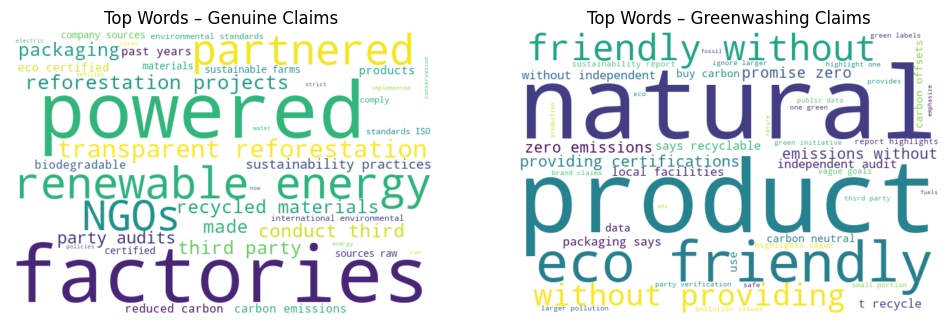

In [24]:
from wordcloud import WordCloud

# Split claims by label
genuine_text = " ".join(df[df["Label"]=="genuine"]["Claim"])
greenwash_text = " ".join(df[df["Label"]=="greenwashing"]["Claim"])

# Word clouds
wc_genuine = WordCloud(width=600, height=400, background_color="white").generate(genuine_text)
wc_green = WordCloud(width=600, height=400, background_color="white").generate(greenwash_text)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(wc_genuine, interpolation='bilinear')
plt.axis("off")
plt.title("Top Words – Genuine Claims")

plt.subplot(1,2,2)
plt.imshow(wc_green, interpolation='bilinear')
plt.axis("off")
plt.title("Top Words – Greenwashing Claims")

plt.show()

In [25]:
import numpy as np

if best_model_name in ["Logistic Regression", "SVM"]:
    feature_names = np.array(vectorizer.get_feature_names_out())
    coefs = best_model.coef_[0]

    top_genuine = np.argsort(coefs)[-10:]
    top_green = np.argsort(coefs)[:10]

    print("💚 Words pushing prediction towards Genuine:")
    print(feature_names[top_genuine])

    print("\n🚩 Words pushing prediction towards Greenwashing:")
    print(feature_names[top_green])


💚 Words pushing prediction towards Genuine:
['recyclable' 'local' 'facilities' 'data' 'certifications' 'providing'
 'product' 'ecofriendly' 'green' 'natural']

🚩 Words pushing prediction towards Greenwashing:
['materials' 'recycled' 'energy' 'powered' 'renewable' 'factories'
 'biodegradable' 'products' 'ecocertified' 'reduced']


In [26]:
import joblib

joblib.dump(best_model, "greenwash_detector_model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")


['vectorizer.pkl']

In [28]:
!pip install streamlit
